Decision Tree model to classify 

(2193, 351)
0                  healthy
1                  healthy
2                  healthy
3                  healthy
4                  healthy
               ...        
2188    early stage cancer
2189    early stage cancer
2190    early stage cancer
2191    early stage cancer
2192    early stage cancer
Name: class_label, Length: 2193, dtype: object
class_label
early stage cancer        781
screening stage cancer    490
mid stage cancer          453
late stage cancer         409
healthy                    60
Name: count, dtype: int64
class_label
cancer     2133
healthy      60
Name: count, dtype: int64
[0 1]
Optimization terminated successfully.
         Current function value: 0.686134
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            class_label   No. Observations:                 2193
Model:                          Logit   Df Residuals:                     1843
Method:                           MLE   D

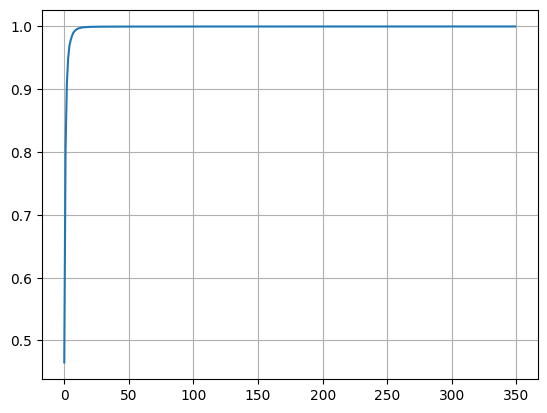

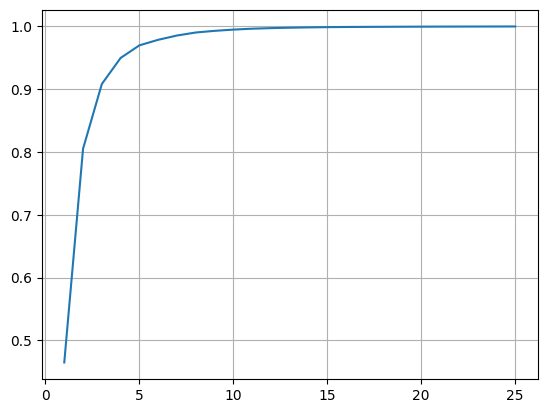

C:\Users\haris\AppData\Local\Temp\ipykernel_18548\204687318.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['class_label'] = train['class_label'].replace(['healthy', 'early stage cancer', 'screening stage cancer', 'mid stage cancer', 'late stage cancer'], [0, 1, 1, 1, 1])
C:\Users\haris\AppData\Local\Temp\ipykernel_18548\204687318.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['class_label'] = test['class_label'].replace(['healthy', 'early stage cancer', 'screening stage cancer', 'mid stage cancer', 'late sta

Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}
Cross-Validation Scores: [0.54166667 0.75       0.70833333 0.47826087 0.52173913]
Mean Accuracy: 0.6
Test Set Accuracy: 0.6625
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        40
           1       0.65      0.70      0.67        40

    accuracy                           0.66        80
   macro avg       0.66      0.66      0.66        80
weighted avg       0.66      0.66      0.66        80



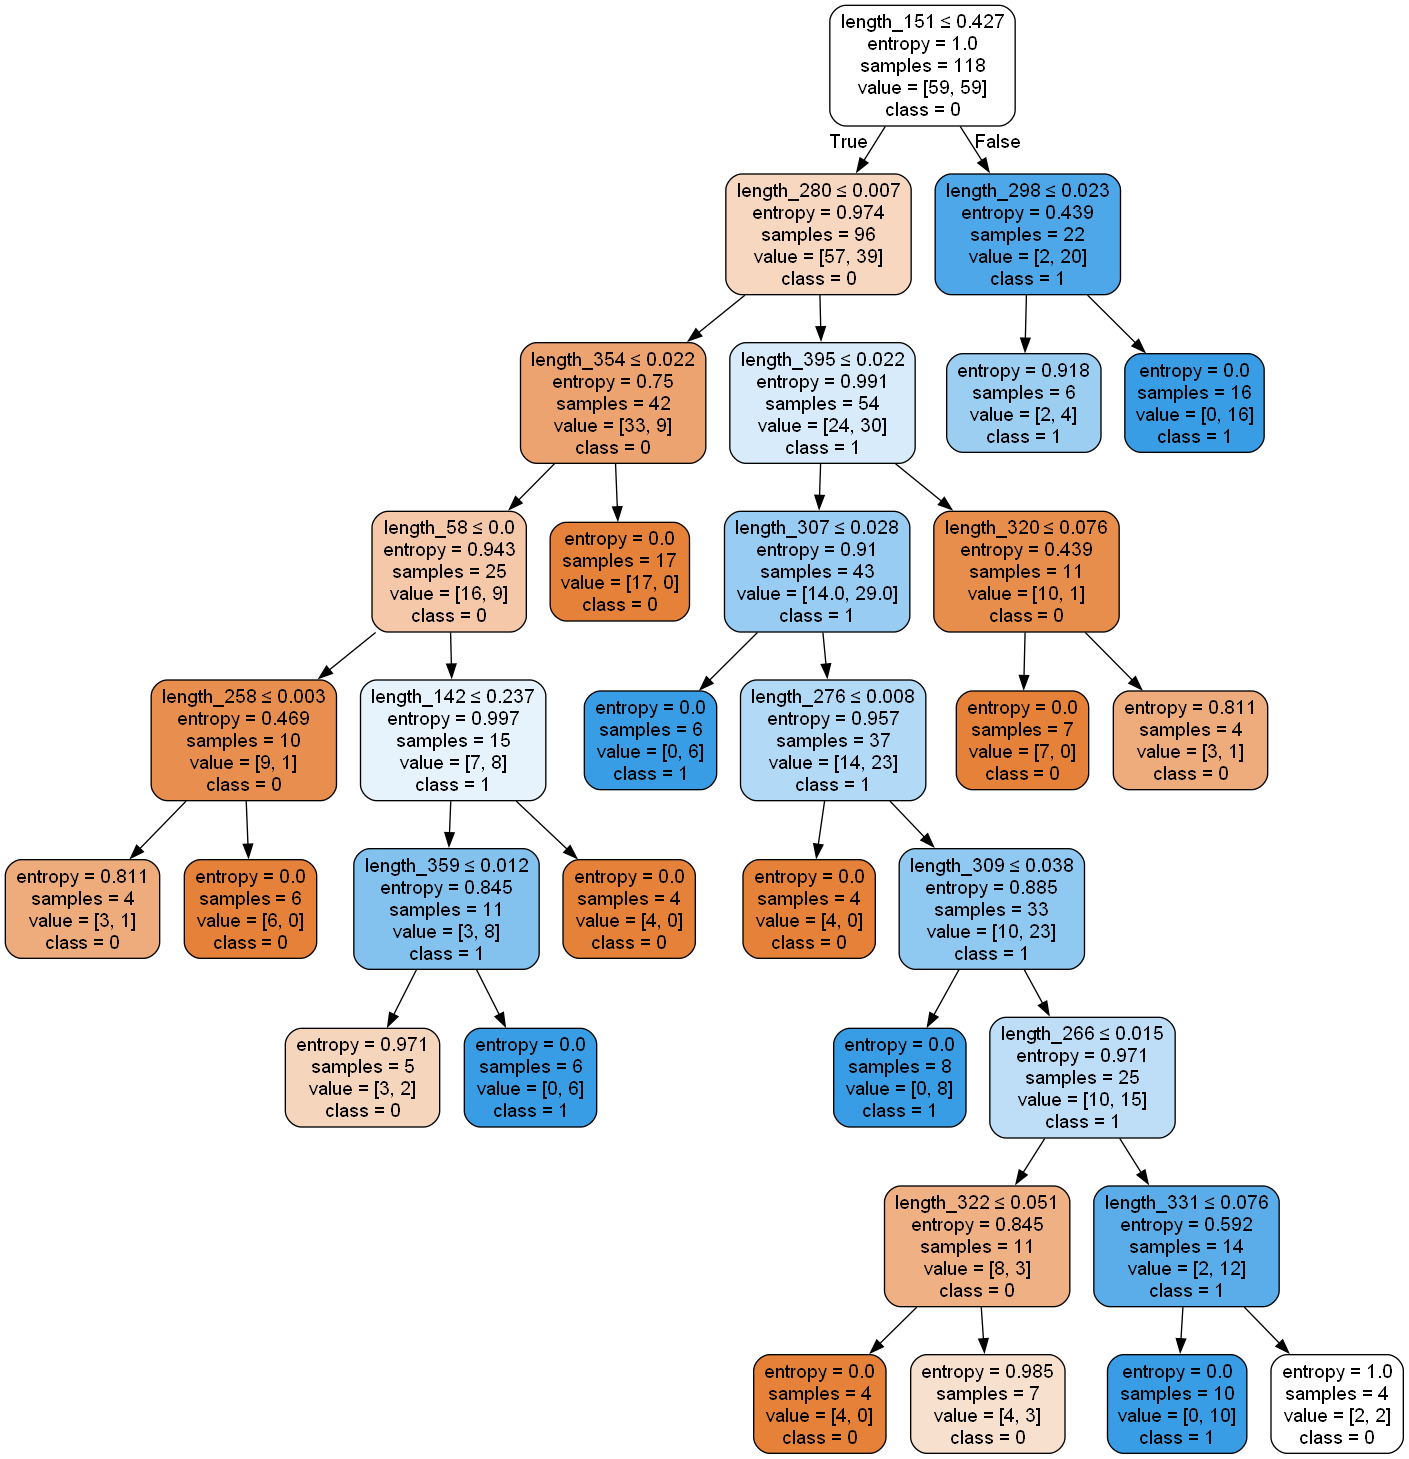

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import GridSearchCV
%run HealthyvsCancer.ipynb


train = pd.read_csv('Train_Set.csv') #, delimiter=',', dtype=None, encoding=None )
column_names = train.columns.tolist()
column_names = column_names[:-1]
#print(column_names)

train['class_label'] = train['class_label'].replace(['healthy', 'early stage cancer', 'screening stage cancer', 'mid stage cancer', 'late stage cancer'], [0, 1, 1, 1, 1])
train_x = train.iloc[1:,:-1]
train_y = train.iloc[1:,-1]


test = pd.read_csv('Test_Set.csv') #, delimiter = ',', dtype = None, encoding = None)
test['class_label'] = test['class_label'].replace(['healthy', 'early stage cancer', 'screening stage cancer', 'mid stage cancer', 'late stage cancer'], [0, 1, 1, 1, 1])
test_x = test.iloc[1:,:-1 ]
test_y = test.iloc[1:,-1]

undersample = RandomUnderSampler(sampling_strategy = 1)

train_x , train_y = undersample.fit_resample(train_x, train_y)
test_x, test_y = undersample.fit_resample(test_x, test_y)

# Define the grid of hyperparameters
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform grid search
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(criterion="entropy"), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_clf = grid_search.best_estimator_

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(best_clf, train_x, train_y, cv=k)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Evaluate the model on the test set
y_pred = best_clf.predict(test_x)
print("Test Set Accuracy:", metrics.accuracy_score(test_y, y_pred))
print(classification_report(test_y, y_pred))

# Visualize the decision tree
dot_data = StringIO()
export_graphviz(best_clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=train_x.columns, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
if '"\\n"' in graph.obj_dict['nodes']:
    graph.del_node('"\\n"')
graph.write_png('cancer.png')
Image(graph.create_png())




Importing necessary libraries and modules to construct Decision tree model. 

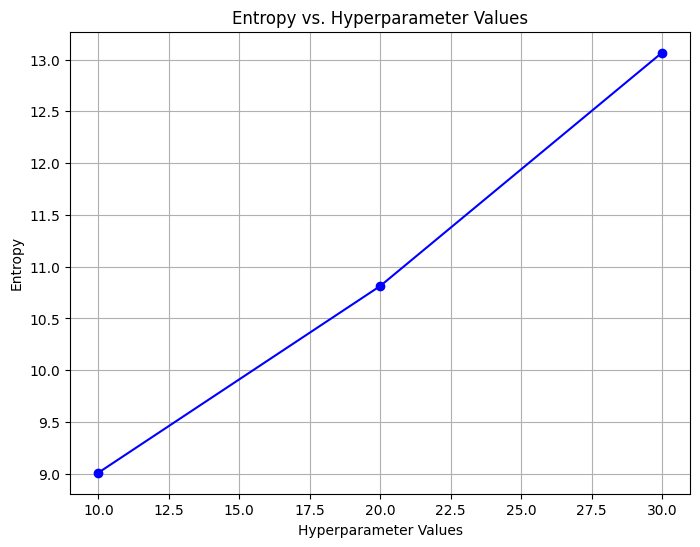

In [6]:
hyperparameter_values = [None, 10, 20, 30]  # Example values of the hyperparameter
entropy_values = []

for value in hyperparameter_values:
    # Train decision tree classifier with current hyperparameter value
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=value)
    clf.fit(train_x, train_y)
    
    # Calculate entropy
    entropy = metrics.log_loss(test_y, clf.predict_proba(test_x))
    entropy_values.append(entropy)

    # Plot entropy chart
plt.figure(figsize=(8, 6))
plt.plot(hyperparameter_values, entropy_values, marker='o', color='blue')
plt.xlabel('Hyperparameter Values')
plt.ylabel('Entropy')
plt.title('Entropy vs. Hyperparameter Values')
plt.grid(True)
plt.show()